## Starter Notebook
EDA Notebook on Crypto-currency Data
Within the zipped file - there are 26000+ csv files in the current version of the dataset:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import os # for accessing directory structure
import pandas as pd
import glob

In [2]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#         print(os.path.join(dirname, filename))


# Above code will print it all like below, this was just for the initial checking
# I am commenting out as this folder has 26000+ file names to pring

# /kaggle/input/crypto-data/train_BTC_combined.csv
# /kaggle/input/crypto-data/Crypto-Coinmarketcap/cr_20170822-152505.csv
# /kaggle/input/crypto-data/Crypto-Coinmarketcap/cr_20170812-020505.csv
# /kaggle/input/crypto-data/Crypto-Coinmarketcap/cr_20170813-065506.csv
# .....

# Defining this input variable as I will be using this in few places
file_dir = './kaggle/input/crypto-data/'

# In Kaggle this file will be as below per Kaggle's file-tree-structure
# file_dir = '/kaggle/input/crypto-data/Crypto-Coinmarketcap/'

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plot_per_column_distribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plot_correlation_matrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plot_scatter_matrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
# First defining variables for the first 2 files to see their structure

nRowsRead = 1000 # specify 'None' if want to read whole file
# These .csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv(file_dir+'cr_20170804-034052.csv', delimiter=',', nrows = nRowsRead)
df2 = pd.read_csv(file_dir+'cr_20170804-035004.csv', delimiter=',', nrows = nRowsRead)


In [7]:
# Let's check 1st file: /kaggle/input/crypto-data/cr_20170804-034052.csv
nRowsRead = 1000 # specify 'None' if want to read whole file
# cr_20170804-034052.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
# df1.dataframeName = 'cr_20170804-034052.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


In [8]:
# Let's take a quick look at what the data looks like:
df1.head(5)

,symbol,ranking,by,market,cap,name,market.1,cap.1,price,circulating,supply,volume,%,1h,%.1,24h,%.2,1wk
0,GMB,1011,Gambleo,?,NaN,$0.000895,?,*,Low,Vol,?,?,NaN,NaN,NaN,NaN,NaN,NaN
1,FTC,164,Feathercoin,"$9,481,236",$0.055794,169932600,"$1,267,140",-0.05%,10.49%,4.99%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HCC,953,Happy,Creator...,?,NaN,$0.000108,?,*,Low,Vol,-0.02%,8.39%,NaN,NaN,NaN,NaN,NaN
3,BRX,288,Breakout,Stake,"$1,793,819",$0.286183,6268082,*,"$4,778",-4.53%,3.35%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UNRC,872,UniversalRoya...,?,NaN,$0.005857,?,*,$664,3.98%,-7.83%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribution graphs (histogram/bar graph) of sampled columns:

In [9]:
# plot_per_column_distribution(df1, 10, 5)

In [10]:
# Let's check 2nd file: /kaggle/input/crypto-data/cr_20170804-035004.csv
df2.dataframeName = 'cr_20170804-035004.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 10 columns


In [11]:
# Let's take a quick look at what the data looks like:
df2.head(5)

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk
0,XBY,190,XtraBYtes,"$7,422,935",$0.011420,"650,000,000",*,"$16,273",-1.36%,-0.03%
1,CPN,637,CompuCoin,"$57,962",$0.002955,"19,615,019",Low Vol,0.34%,-4.69%,-31.49%
2,CHEAP,976,Cheapcoin,?,$0.000112,?,*,Low Vol,0.02%,105.40%
3,BLAS,700,BlakeStar,"$27,044",$0.000112,"242,418,240",Low Vol,0.02%,-5.80%,?
4,CPC,341,Capricoin,"$848,890",$0.426568,"1,990,045",*,"$18,457",-0.49%,3.66%


Distribution graphs (histogram/bar graph) of sampled columns:

In [12]:
# plot_per_column_distribution(df2, 10, 5)

In [13]:
print(df1.shape)
print(df1.dtypes)

(1000, 18)
symbol          object
ranking          int64
by              object
market          object
cap             object
name            object
market.1        object
cap.1           object
price           object
circulating     object
supply          object
volume          object
%               object
1h              object
%.1            float64
24h            float64
%.2            float64
1wk            float64
dtype: object


In [14]:
# Given I have 26,000+ .csv files, I dont have enough GPU power to combine all of them
# either in Kaggle Kernel or in my local Machine. Hence, I will take 9432 of those files.
# There's no precise reason behind the number 9432 - I just could copy that many files at a time in my machine
# combine those 9432 file's contents to a single pandas data-frame
# So let's print all the files in the directory.

!ls $file_dir | wc -l  # 9432


9432


In [15]:
# Defining a variable for to hold a Python-list of .csv files in that directory
# files_list = glob.glob(os.path.join(file_dir, "*.csv"))
all_files = glob.glob(os.path.join(file_dir, "*.csv"))

# lets take the first 1400 .csv file (from which I shall create a combined-dataframe)
# Note in the original .zipped folder (uploaded to Kaggle) there are 26,000+ files.
# But for the sake of running this data in local file-system.
files_list = all_files[:9432]

# lets create dataframes and print them to see if it working

df1 = pd.read_csv(files_list[0])
df2 = pd.read_csv(files_list[1])

df1.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk
0,XBY,224,XtraBYtes,"$5,760,242",$0.008862,"650,000,000",*,"$10,278",-5.60%,-0.55%
1,CPN,698,CompuCoin,"$59,253",$0.003021,"19,615,019",Low Vol,-1.19%,-17.47%,14.35%
2,CHEAP,941,Cheapcoin,?,$0.000085,?,*,Low Vol,-2.59%,4.71%
3,BLAS,381,BlakeStar,"$811,319",$0.003321,"244,268,640","$81,686",-2.83%,15.00%,526.99%
4,CPC,386,Capricoin,"$774,826",$0.389351,"1,990,045",*,"$24,731",-4.53%,-8.95%


In [16]:
df2.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk
0,MIU,1043,MIYUCoin,?,$0.000047,?,Low Vol,0.53%,2.81%,11.19%
1,XBY,196,XTRABYTES,"$11,860,841",$0.028140,"421,500,000",*,"$146,279",2.54%,21.30%
2,CPN,704,CompuCoin,"$65,942",$0.003362,"19,615,019",Low Vol,0.74%,7.33%,-16.30%
3,CHEAP,1094,Cheapcoin,?,$0.000092,?,*,Low Vol,?,1.15%
4,BLAS,479,BlakeStar,"$155,576",$0.000630,"246,894,112","$4,413",15.64%,6.42%,69.75%


### Code to combine 9432 .csv files into a single dataframe and then
### Filter data for 'Symbol' column == 'BTC'
### generating a .csv file out that combined-single dataframe to work with.

As we can see above, all these files have the same columns so it seems reasonable to concatenate everything into one dataframe. However, I want to keep track of the file names because that's the only reference to the date of the records.

- First, creating a list of dataframes with the filenames in a "file_name" column
- Then concatenate them all into one big dataframe

#### The  below are the scripts for that, but I have commented-out all of these lines,
#### as obviously I dont want to run this huge process-intensive steps every time
#### of creating a single DataFrame out of 9432 .csv files.

In [17]:
# dataframes = [pd.read_csv(file).assign(file_name=os.path.basename(file).strip(".csv")) for file in files_list]
# combined_df = pd.concat(dataframes, ignore_index=True)
# combined_df.head()

In [18]:
# combined_df.shape

##### The above dataframe has all the SYMBOLS of all the crypto-currencies as was in the individual .csv files.
##### But now I want to extract ONLY the symbol 'BTC' for Bitcoin for the further analysis.

Below is the code for that.

In [19]:
# Creating a dataframe, by filtering only the rows where the column 'Symbol' is 'BTC'

# btc_df = combined_df[combined_df['symbol'] == 'BTC']
# btc_df.shape

#### Now generating a .csv file contain which will be used as a training dataset
#### This file is created out that combined-single dataframe (that I earlier created from 9432 .csv files )
as obviously I dont want to run this huge process-intensive step of creating a single
Data-Frame out of 9432 .csv files.

Below code is commented out as well, because I have run this script just once to create the file.
And then I have saved the file (to be used as an input) both in Kaggle and also for my local machine

In [20]:
# btc_df.to_csv("train_BTC_combined.csv", index=False)

# Passing index=False so as not to not write out an 'unnamed' index column to the combined dataframe

In [21]:
# Now that I have already created a .csv with the combined dataframe for BTC, lets use that going forward.
original_btc_train = pd.read_csv("train_BTC_combined.csv")

# The same code above will be as below in Kaggle because of the Kaggle's file-tree-structure for uploaded input-data
# original_btc_train = pd.read_csv("/kaggle/input/crypto-data/train_BTC_combined.csv")

original_btc_train.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk,...,market.1,cap.1,circulating,supply,%,1h,%.1,24h,%.2,1wk
0,BTC,1.0,Bitcoin,"$70,846,063,125",$4291.75,"16,507,500","$2,814,510,000",-2.16%,5.57%,24.99%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BTC,1.0,Bitcoin,"$76,715,293,809",$4639.63,"16,534,787","$1,731,360,000",0.56%,2.73%,10.53%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BTC,1.0,Bitcoin,"$71,411,773,702",$4316.74,"16,542,987","$2,080,400,000",-2.51%,-6.91%,0.54%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BTC,1.0,Bitcoin,"$67,158,717,638",$4066.51,"16,515,075","$2,796,620,000",-0.71%,-5.92%,9.26%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BTC,1.0,Bitcoin,"$67,243,714,005",$4071.86,"16,514,250","$2,611,450,000",-1.38%,-5.83%,13.93%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
original_btc_train.shape

(9431, 25)

Lets analyze the dataframe with .info() method. This method prints a concise summary of the data frame, including the column names and their data types, the number of non-null values, the amount of memory used by the data frame.

In [23]:
original_btc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9431 entries, 0 to 9430
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symbol                 9431 non-null   object 
 1   ranking by market cap  9430 non-null   float64
 2   name                   9431 non-null   object 
 3   market cap             9430 non-null   object 
 4   price                  9431 non-null   object 
 5   circulating supply     9430 non-null   object 
 6   volume                 9430 non-null   object 
 7   % 1h                   9430 non-null   object 
 8   % 24h                  9430 non-null   object 
 9   % 1wk                  9430 non-null   object 
 10  file_name              9431 non-null   object 
 11  ranking                1 non-null      float64
 12  by                     1 non-null      object 
 13  market                 1 non-null      object 
 14  cap                    1 non-null      object 
 15  mark

As shown above, the data sets do not contain null values but some of the columns where I expected numerical or float values, instead contain object Dtype like the 'market cap' column.

Also starting with 'file_name' upto '1wk' columns dont have

In [24]:
# All Features List
print("All Features list", original_btc_train.columns.tolist())
print("\nMissing Values", original_btc_train.isnull().any())
print("\nUnique Values ", original_btc_train.nunique())

All Features list ['symbol', 'ranking by market cap', 'name', 'market cap', 'price', 'circulating supply', 'volume', '% 1h', '% 24h', '% 1wk', 'file_name', 'ranking', 'by', 'market', 'cap', 'market.1', 'cap.1', 'circulating', 'supply', '%', '1h', '%.1', '24h', '%.2', '1wk']

Missing Values symbol                   False
ranking by market cap     True
name                     False
market cap                True
price                    False
circulating supply        True
volume                    True
% 1h                      True
% 24h                     True
% 1wk                     True
file_name                False
ranking                   True
by                        True
market                    True
cap                       True
market.1                  True
cap.1                     True
circulating               True
supply                    True
%                         True
1h                        True
%.1                       True
24h                       T

In [25]:
# Remove the '$' and the extra commas from the 'market cap' column

# In the real world data set, to see if there are are non-numeric values in the column.
# my first approach was to try to use astype() as below commented out line
# original_btc_train['market cap'].astype('float')
# The output would be - could not convert string to float: '$70,846,063,125 '

# So now, let’s try removing the ‘$’ and ‘,’ using str.replace :
original_btc_train['market cap'] =original_btc_train['market cap'].str.replace(',', '')
original_btc_train['market cap'] =original_btc_train['market cap'].str.replace('$', '')
original_btc_train['market cap']

0       70846063125 
1       76715293809 
2       71411773702 
3       67158717638 
4       67243714005 
            ...     
9426    71308175058 
9427    70475225454 
9428    72348215185 
9429    68520412389 
9430    67490059171 
Name: market cap, Length: 9431, dtype: object

In [26]:
original_btc_train.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk,...,market.1,cap.1,circulating,supply,%,1h,%.1,24h,%.2,1wk
0,BTC,1.0,Bitcoin,70846063125,$4291.75,"16,507,500","$2,814,510,000",-2.16%,5.57%,24.99%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BTC,1.0,Bitcoin,76715293809,$4639.63,"16,534,787","$1,731,360,000",0.56%,2.73%,10.53%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BTC,1.0,Bitcoin,71411773702,$4316.74,"16,542,987","$2,080,400,000",-2.51%,-6.91%,0.54%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BTC,1.0,Bitcoin,67158717638,$4066.51,"16,515,075","$2,796,620,000",-0.71%,-5.92%,9.26%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BTC,1.0,Bitcoin,67243714005,$4071.86,"16,514,250","$2,611,450,000",-1.38%,-5.83%,13.93%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# and now if I run below
original_btc_train['market cap'].astype('float')

0       7.084606e+10
1       7.671529e+10
2       7.141177e+10
3       6.715872e+10
4       6.724371e+10
            ...     
9426    7.130818e+10
9427    7.047523e+10
9428    7.234822e+10
9429    6.852041e+10
9430    6.749006e+10
Name: market cap, Length: 9431, dtype: float64

In [28]:
btc_train = original_btc_train.set_index('symbol')
btc_train.head()

,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk,file_name,...,market.1,cap.1,circulating,supply,%,1h,%.1,24h,%.2,1wk
symbol,,,,,,,,,,,,,,,,,,,,,
BTC,1.0,Bitcoin,70846063125,$4291.75,"16,507,500","$2,814,510,000",-2.16%,5.57%,24.99%,r_20170815-071005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BTC,1.0,Bitcoin,76715293809,$4639.63,"16,534,787","$1,731,360,000",0.56%,2.73%,10.53%,r_20170831-114005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BTC,1.0,Bitcoin,71411773702,$4316.74,"16,542,987","$2,080,400,000",-2.51%,-6.91%,0.54%,r_20170904-085005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BTC,1.0,Bitcoin,67158717638,$4066.51,"16,515,075","$2,796,620,000",-0.71%,-5.92%,9.26%,r_20170819-065505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BTC,1.0,Bitcoin,67243714005,$4071.86,"16,514,250","$2,611,450,000",-1.38%,-5.83%,13.93%,r_20170818-210005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
market_cap = btc_train[['market cap']]
market_cap.head()

,market cap
symbol,
BTC,70846063125
BTC,76715293809
BTC,71411773702
BTC,67158717638
BTC,67243714005


### Rolling Mean (Moving Average) — to determine trend

A simple moving average, also called a rolling or running average is formed by computing the average price of a security over a specific number of periods. Most moving averages are based on closing prices; for example, a 5-day simple moving average is the five-day sum of closing prices divided by five. As its name implies, a moving average is an average that moves. Old data is dropped as new data becomes available, causing the average to move along the time scale. The example below shows a 5-day moving average evolving over three days.

```
Daily Closing Prices: 11,12,13,14,15,16,17

First day of 5-day SMA: (11 + 12 + 13 + 14 + 15) / 5 = 13

Second day of 5-day SMA: (12 + 13 + 14 + 15 + 16) / 5 = 14

Third day of 5-day SMA: (13 + 14 + 15 + 16 + 17) / 5 = 15
```
The first day of the moving average simply covers the last five days. The second day of the moving average drops the first data point (11) and adds the new data point (16).

The moving average is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean. Moving averages are widely used in finance to determine trends in the market and in environmental engineering to evaluate standards for environmental quality such as the concentration of pollutants.

Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it will follow the trend and less likely to deviate outside its resistance point.

In [30]:
market_cap.rolling(window=3).mean()

,market cap
symbol,
BTC,NaN
BTC,NaN
BTC,7.299104e+10
BTC,7.176193e+10
BTC,6.860474e+10
...,...
BTC,7.052990e+10
BTC,6.962013e+10
BTC,7.137721e+10


In [31]:
market_cap['ma_rolling_3'] = market_cap['market cap'].rolling(window=3).mean().shift(1)
market_cap

/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market cap,ma_rolling_3
symbol,,
BTC,70846063125,NaN
BTC,76715293809,NaN
BTC,71411773702,NaN
BTC,67158717638,7.299104e+10
BTC,67243714005,7.176193e+10
...,...,...
BTC,71308175058,6.985996e+10
BTC,70475225454,7.052990e+10
BTC,72348215185,6.962013e+10


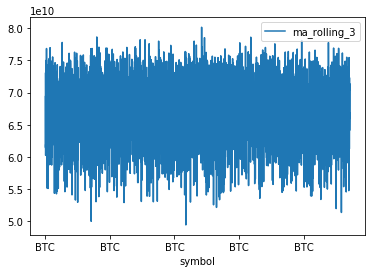

In [32]:
market_cap.plot()

